<a href="https://colab.research.google.com/github/Xiaocong233/ReinforcementLearning_ML/blob/master/epsilon_greedy_tutorial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Reinforcement Learning Tutorial in Python**
###### Created by **Xiaocong Yan** for [StartOnAI](https://startonai.com/)
---


## 1. Introduction to RL

![alt text](https://lilianweng.github.io/lil-log/assets/images/RL_illustration.png)

- What is Reinforcement Learning?
  - RL is a subfield in machine learning, it particularly focuses on training AI agents to behave in a certain way by learning directly from its surrounding environment
  - Essentially, we are training the agent to choose the optimal action (`a`) given a state (`s`) from the environment that will maxmimizes an engineered reward (`r`)

- RL Applications
  - gameplaying AI
    - AlphaGo

    <img src="https://cdn.geekwire.com/wp-content/uploads/2016/03/160312-go-630x353.jpg" alt="alt text" width="500" height="300">

    - AlphaStar

    <img src="https://www.version2.dk/sites/v2/files/topillustration/2019/01/alphastarscreenshot.png" alt="alt text" width="600" height="337">
  
  - agent in simulation learning to walk
  
  <img src="https://nav74neet.github.io/media/blog/walking.png" alt="alt text"  width='600' height='250'>

  - robots learning to walk

    <img src="https://www.researchgate.net/profile/Pieter_Jonker/publication/236015074/figure/fig1/AS:299857928572950@1448503109999/a-LEO-a-2D-walking-robot-suitable-for-on-line-Reinforcement-Learning-8-b-Simplest.png" alt="alt text"  width='340' height='255'>

## 2. Explore-exploit dilemma and Multi-Armed Bandit Problem

- A fundamental intuition of RL lies within the balancing of explore and exploit
- Example: casino multi-armed bandits (slot machines)
  ![alt text](https://miro.medium.com/max/1250/1*7axVBpiVF4VQCxxP1UNcnw.png)
    - suppose we have three bandits with their own unique probablities of winning the jackpot
      - in the start, we have no ideas what the probabilities are
      - we want to start playing more: "explore" to find the bandit with the highest winning rate as quickly as possible such that we can then "exploit" it by playing solely on it

### 2A. Greedy
  - drawing upon an updating sample proportion `p_hat` of each bandit (current number of wins / times played on the bandit), a basic greedy algorithm, as its name suggests, will only choose the bandit with the highest current sample proportion
  - problem: `p_hat` may be drastically different than the real probability, especially in the beginning where we don't have many samples or times played yet
    - if we draw two bandits and one return a win and the other a loss, updating `p_hat` will result in 1 for the victorious bandit and 0 for the losing bandit.
      - we will never again choose the losing bandit ever again using greedy algorithm since no matter how many times we update the probability for the victorious bandit, it will never reach below 0
      - we will be missing out on exploring the losing bandit at all and choose to solely exploit the winning bandit, when in reality, the unlucky losing bandit may have a much higher real winning probability

### 2B. Epsilon Greedy
  - solution to the greedy problem: adding a chance in each draw, parameterized by variable `epsilon`, where we will choose randomly from all the existing bandits, regardless of their sample proportions
  - thus it is created a fundamental algorithm behind RL

optimal bandit: 4
bandit1 estimate win-rate: 0.0 | true win_rate: 0
bandit2 estimate win-rate: 0.264 | true win_rate: 0.25
bandit3 estimate win-rate: 0.496 | true win_rate: 0.5
bandit4 estimate win-rate: 0.746 | true win_rate: 0.75

total reward: 6995.0
overall win-rate: 0.6995
explore count: 967
exploit count: 9033
optimal selection count: 8849
optimal selection rate: 0.8849


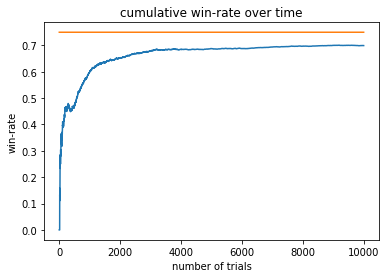

In [16]:
import matplotlib.pyplot as plt
import numpy as np

# creating the blueprint for a bandit slot machine
class Bandit:
  def __init__(self, p):
    self.p = p # the winning rate
    self.p_hat = 0. # sample proportion, or the estimation for the winning rate, intialized to 0
    self.n = 0. # number of samples collected

  def pull(self):
    # draw the virtual bandit with a random probability p and check if won according to the winning rate
    # return 1 if won, 0 if lost
    return np.random.random() < self.p

  def update(self, x):
    # increment numbers of samples collected
    self.n += 1.
    # calculate the new p hat from the previous p hat and the newly obtained value (0 or 1)
    self.p_hat = ((self.n - 1) * self.p_hat + x) / self.n

def run_simulation(bandits_probs_list, epsilon, n):
  # create a list of bandit objects according to their probabilities of win rate
  bandits = [Bandit(p) for p in bandits_probs_list]
  
  # initialize variables
  rewards = np.zeros(n)
  times_explored = 0
  times_exploited = 0
  times_optimal_chosen = 0

  # selecting the optimal bandit based the highest true probability
  optimal_bandit = np.argmax([bandit.p for bandit in bandits])
  # print out the true optimal bandit number
  print('optimal bandit:', optimal_bandit + 1) # +1 because optimal_bandit is 0 indexed

  # use epsilon_greedy to select the next bandit
  for i in range(n):
    # if probability drawn is smaller than epsilon, randomly select a bandit
    if np.random.random() < epsilon:
      times_explored += 1
      bandit = np.random.randint(len(bandits))
    # else selecting the bandit with the highest p_hat
    else:
      times_exploited += 1
      bandit = np.argmax([bandit.p_hat for bandit in bandits])
                         
    # check if the bandit chosen is actually the optimal bandit
    if bandit == optimal_bandit:
      # update the correct action count
      times_optimal_chosen += 1

    # pull the arm for the bandit selected
    x = bandits[bandit].pull()

    # update rewards logs and sample proportion estimates accordingly
    rewards[i] = x
    bandits[bandit].update(x)     
  
  # print proportion estimates for each bandit
  for i, bandit in enumerate(bandits):
    print(f'bandit{i + 1} estimate win-rate: {round(bandit.p_hat, 3)} | true win_rate: {bandit.p}')

  # print total reward
  print()
  print('total reward:', rewards.sum())
  print('overall win-rate:', rewards.sum() / n)
  print('explore count:', times_explored)
  print('exploit count:', times_exploited)
  print('optimal selection count:', times_optimal_chosen)
  print('optimal selection rate:', times_optimal_chosen / n)

  # plot the results
  cumulative_rewards = np.cumsum(rewards)
  win_rates = cumulative_rewards / (np.arange(n) + 1)
  plt.plot(win_rates)
  plt.plot(np.ones(n) * np.max(bandits_probs_list))
  plt.title('cumulative win-rate over time')
  plt.xlabel('number of trials')
  plt.ylabel('win-rate')
  plt.show()

if __name__ == '__main__':
  # simulate a multi-armed bandit problem with 4 machines with win-rates 0, 0.25, 0.5, 0.75
  # default random selection to happen 10% of the time, thus epsilon of 0.1
  # default to 10000 trials
  run_simulation([0, 0.25, 0.5, 0.75], 0.1, 10000)

## Sources: